In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data", header=None, na_values="?")

In [3]:
var_names = ['Class','AGE','SEX','Steroid','Antiviral',
             'Fatigue','MALAISE','ANOREXIA', 'LIVER_BIG', 'LIVER FIRM', 
             'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 
             'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 
             'PROTIME', 'HISTOLOGY']

In [4]:
data.columns = var_names

In [5]:
data.head()

,Class,AGE,SEX,Steroid,Antiviral,Fatigue,MALAISE,ANOREXIA,LIVER_BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [6]:
data['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [7]:
import fancyimpute

/home/subhasis/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
data2 = data.drop(['Class'],axis=1)

In [9]:
mice_imputer = fancyimpute.MICE(verbose=False)

In [10]:
data2_complete = mice_imputer.complete(np.array(data2))

In [11]:
data2_complete = pd.DataFrame(data2_complete, columns=data2.columns)

In [12]:
data_complete = pd.concat([data['Class'],data2_complete],axis=1)

In [13]:
data_complete.head()

,Class,AGE,SEX,Steroid,Antiviral,Fatigue,MALAISE,ANOREXIA,LIVER_BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30.0,2.0,1.000000,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,69.963460,1.0
1,2,50.0,1.0,1.000000,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,58.202836,1.0
2,2,78.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,55.337401,1.0
3,2,31.0,1.0,1.636151,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1.0
4,2,34.0,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,125.126405,200.0,4.0,58.733756,1.0


In [14]:
Y_train = data_complete['Class']
X_train = data_complete.drop('Class',axis=1)

In [15]:
tree_model = DecisionTreeClassifier(max_depth=2)

In [16]:
tree_model.fit(X=X_train, y=Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

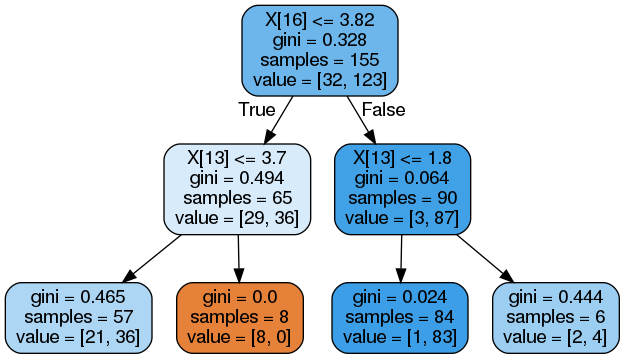

In [17]:
dot_file = StringIO()

export_graphviz(tree_model, out_file= dot_file,filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_file.getvalue())
Image(graph.create_png())

In [18]:
pred_tree = tree_model.predict(X=X_train)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
confusion_matrix(y_true=Y_train, y_pred=pred_tree)

array([[  8,  24],
       [  0, 123]])

In [21]:
accuracy_score(y_true=Y_train, y_pred=pred_tree)

0.8451612903225807

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score

In [23]:
train_X, test_X, train_Y, test_Y = train_test_split(X_train, Y_train, 
                                                    test_size=0.4, 
                                                    random_state=12345)

In [24]:
tree_model.fit(X=train_X, y=train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
pred_test = tree_model.predict(X=test_X)

In [26]:
confusion_matrix(y_true=test_Y, y_pred=pred_test)

array([[ 2,  7],
       [ 4, 49]])

In [27]:
x = np.linspace(0,100,num=100)
y = x**2 + x + np.random.normal(20,500,100)

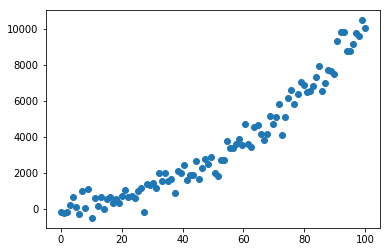

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)

In [29]:
tree_regressor = DecisionTreeRegressor(max_depth=3)

In [30]:
tree_regressor.fit(X=x.reshape(100,1), y=y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
P = tree_regressor.predict(X=x.reshape(100,1))

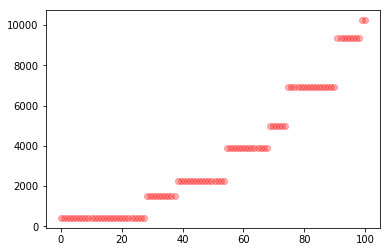

In [32]:
plt.scatter(x,P, c='red',alpha=0.3)

In [33]:
pred_tree_prob = tree_model.predict_proba(X=X_train)

In [34]:
pred_tree_prob[:6,:]

array([[0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [35]:
D = np.vstack((Y_train,pred_tree_prob[:,1])).T

In [36]:
D[:6,:]

array([[2.        , 1.        ],
       [2.        , 0.66666667],
       [2.        , 1.        ],
       [2.        , 1.        ],
       [2.        , 1.        ],
       [2.        , 1.        ]])

In [37]:
D1= pd.DataFrame(D, columns=['label','prob'])

In [38]:
D1.head()

,label,prob
0,2.0,1.000000
1,2.0,0.666667
2,2.0,1.000000
3,2.0,1.000000
4,2.0,1.000000


In [39]:
pred_1 = np.where(D1['prob']>-0.01,2,1)

In [40]:
pred_1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [41]:
conf_mat = confusion_matrix(Y_train, pred_1)
conf_mat

array([[  0,  32],
       [  0, 123]])

In [42]:
sens = conf_mat[0,0]/sum(conf_mat[0,:])
spec = conf_mat[1,1]/sum(conf_mat[1,:])

In [43]:
sens, spec

(0.0, 1.0)

In [44]:
trp = sens
fpr = 1-spec

In [45]:
TPR = []
FPR = []
for th in [-0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.01]:
    p = np.where(D1['prob']>th,2,1)
    c = confusion_matrix(Y_train, p)
    sen = c[0,0]/sum(c[0,:])
    fpr = 1 - (c[1,1]/sum(c[1,:]))
    TPR.append(sen)
    FPR.append(fpr)

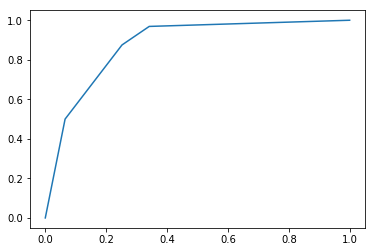

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(FPR, TPR)

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train = np.where(Y_train==1,0,1)
perf = roc_curve(y_true=y_train, y_score=pred_tree_prob[:,0])

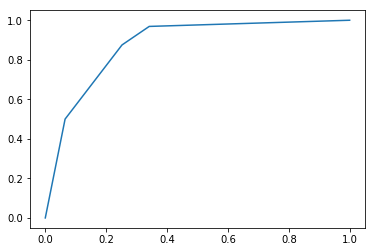

In [48]:
plt.plot(perf[1],perf[0])

In [49]:
roc_auc_score(y_true=y_train, y_score=pred_tree_prob[:,1])

0.8755081300813008

In [50]:
C = confusion_matrix(y_true=Y_train, y_pred=pred_tree)
C

array([[  8,  24],
       [  0, 123]])

In [51]:
acc = (C[0,0]+C[1,1])/sum(C.flatten())

In [52]:
p_1_ref = sum(C[0,:])/sum(C.flatten())
p_2_ref = sum(C[1,:])/sum(C.flatten())
p_1_pred = sum(C[:,0])/sum(C.flatten())
p_2_pred = sum(C[:,1])/sum(C.flatten())

In [53]:
p_1_ref, p_1_pred, p_2_ref, p_2_pred

(0.2064516129032258,
 0.05161290322580645,
 0.7935483870967742,
 0.9483870967741935)

In [54]:
p_e = p_1_ref*p_1_pred + p_2_ref*p_2_pred

In [55]:
K = (acc-p_e)/(1-p_e)
K

0.3459915611814347

In [56]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [57]:
tree_new = DecisionTreeClassifier()

In [58]:
grid_param = {'max_depth':[3,4,5,6,7,8],'criterion':['gini','entropy']}

In [59]:
grid_search_model = GridSearchCV(tree_new, param_grid=grid_param,cv=5,
                                 n_jobs=-1, scoring='roc_auc')

In [60]:
grid_search_model.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [61]:
final_model = grid_search_model.best_estimator_

In [62]:
cross_val_score(final_model, X=X_train, y=y_train, cv=5, scoring='roc_auc')

array([0.66      , 0.83714286, 0.87      , 0.65625   , 0.66666667])

In [63]:
grid_search_model.best_params_

{'criterion': 'gini', 'max_depth': 4}